In [1]:
import os
import glob
import pandas as pd
import numpy as np
from image_match.goldberg import ImageSignature

#make list of all image files
indir="C:\\datasources\\rawPNGS"
os.chdir(indir)
fileList=glob.glob("*.png")

imagelist = []
siglist = []
gis = ImageSignature()

#create sigs for all images
for i in fileList:
    sig = gis.generate_signature(i)
    imagelist.append(i)
    siglist.append(sig)

#make dataframe and derive mori idents from filenames     
df = pd.DataFrame({'Image_name': imagelist,
                   'Signature': siglist})

df[['MORI_id', 'pagenum', 'pxwide', 'pxhigh']] = df['Image_name'].str.split('_', expand=True)
df[['pxhigh', 'imgtype']] = df['pxhigh'].str.split('.', expand=True)

#save preprocessed file
#df.to_csv("C:\\datasources\\ULTRApreprocessed.csv", sep='|', encoding='utf-8', index=False)
df.head(8)

,Image_name,Signature,MORI_id,pagenum,pxwide,pxhigh,imgtype
0,0000017352_0001_1248_1575.png,"[0, 0, 0, 0, -1, 0, -2, -2, 0, 0, 0, 1, -1, -2...",0000017352,0001,1248,1575,png
1,0000017352_0002_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, -1, 0, 0, 0, 1, 1, 1, -...",0000017352,0002,1248,1575,png
2,0000017352_0003_1248_1575.png,"[0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, -2, 2, 2, 2,...",0000017352,0003,1248,1575,png
3,0000017352_0004_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2,...",0000017352,0004,1248,1575,png
4,0000017352_0005_1248_1575.png,"[0, 0, 0, 0, -1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2,...",0000017352,0005,1248,1575,png
5,0000017352_0006_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 2, 0, 0, 0, 1, -1, 1, 2...",0000017352,0006,1248,1575,png
6,0000017352_0007_1248_1575.png,"[0, 0, 0, 0, -1, 0, -1, 2, 0, 0, 0, 1, -1, 1, ...",0000017352,0007,1248,1575,png
7,0000017352_0008_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,...",0000017352,0008,1248,1575,png


In [2]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

X = siglist
kmeans = KMeans(n_clusters=24, random_state=0).fit(X)
labels = kmeans.labels_
df['catlabel'] = pd.Series(labels)

df.head(20)

,Image_name,Signature,MORI_id,pagenum,pxwide,pxhigh,imgtype,catlabel
0,0000017352_0001_1248_1575.png,"[0, 0, 0, 0, -1, 0, -2, -2, 0, 0, 0, 1, -1, -2...",0000017352,0001,1248,1575,png,2
1,0000017352_0002_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, -1, 0, 0, 0, 1, 1, 1, -...",0000017352,0002,1248,1575,png,13
2,0000017352_0003_1248_1575.png,"[0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, -2, 2, 2, 2,...",0000017352,0003,1248,1575,png,17
3,0000017352_0004_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2,...",0000017352,0004,1248,1575,png,5
4,0000017352_0005_1248_1575.png,"[0, 0, 0, 0, -1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2,...",0000017352,0005,1248,1575,png,16
5,0000017352_0006_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 2, 0, 0, 0, 1, -1, 1, 2...",0000017352,0006,1248,1575,png,18
6,0000017352_0007_1248_1575.png,"[0, 0, 0, 0, -1, 0, -1, 2, 0, 0, 0, 1, -1, 1, ...",0000017352,0007,1248,1575,png,17
7,0000017352_0008_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,...",0000017352,0008,1248,1575,png,13
8,0000017352_0009_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 2,...",0000017352,0009,1248,1575,png,20
9,0000017352_0010_1248_1575.png,"[0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, -2, -2, 2, 1...",0000017352,0010,1248,1575,png,4


In [6]:
df['catlabel'] = df['catlabel'] + 1

df.to_csv("C:\\datasources\\ULTRAlabeled.csv", sep='|', encoding='utf-8', index=False)

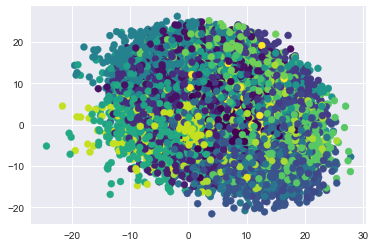

In [7]:
import seaborn as sns; sns.set()
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
xform = svd.fit_transform(X)

plt.scatter(xform[:, 0], xform[:, 1], c=labels, cmap='viridis')

In [5]:
df['catlabel'].value_counts()

22    1026
18     921
11     910
4      883
9      882
17     843
15     841
3      835
1      819
8      812
19     797
14     790
5      786
7      783
6      750
21     730
2      724
13     684
10     653
23     635
24     540
12     533
16     239
20     196
Name: catlabel, dtype: int64

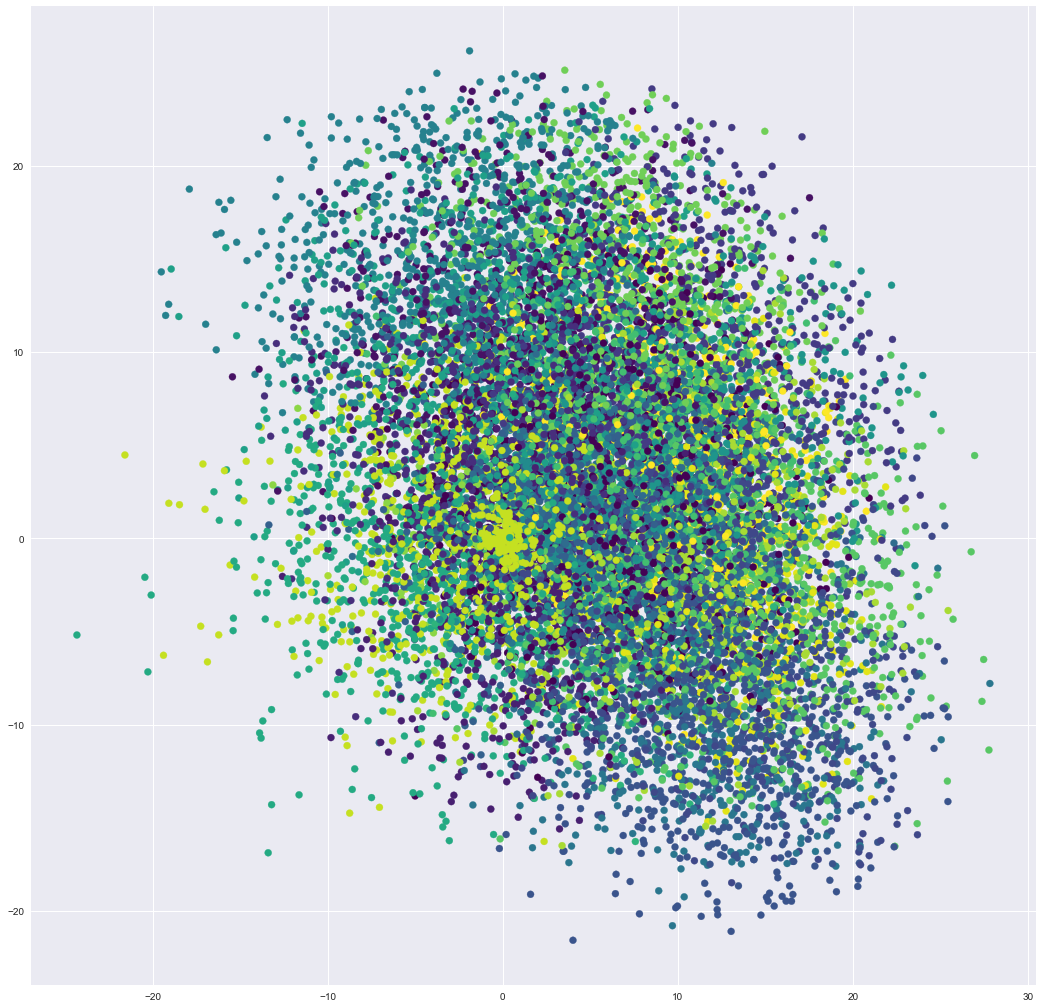

In [9]:
plt.rcParams['figure.figsize'] = [18, 18]
plt.scatter(xform[:, 0], xform[:, 1], c=labels, cmap='viridis')

In [16]:
xf = pd.Series(list(xform))
df['xform'] = xf
df.head(5)

,Image_name,Signature,MORI_id,pagenum,pxwide,pxhigh,imgtype,catlabel,xform
0,0000017352_0001_1248_1575.png,"[0, 0, 0, 0, -1, 0, -2, -2, 0, 0, 0, 1, -1, -2...",0000017352,0001,1248,1575,png,3,"[10.273570009429493, -0.18872762972590013]"
1,0000017352_0002_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, -1, 0, 0, 0, 1, 1, 1, -...",0000017352,0002,1248,1575,png,14,"[-0.3403349314946934, 3.518756127966204]"
2,0000017352_0003_1248_1575.png,"[0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, -2, 2, 2, 2,...",0000017352,0003,1248,1575,png,18,"[12.10150410010898, -4.588441684911246]"
3,0000017352_0004_1248_1575.png,"[0, 0, 0, 0, -1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2,...",0000017352,0004,1248,1575,png,6,"[21.489924797848158, -8.121354734886031]"
4,0000017352_0005_1248_1575.png,"[0, 0, 0, 0, -1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2,...",0000017352,0005,1248,1575,png,17,"[15.346474161568487, 8.85337265916273]"


In [17]:
df.to_csv("C:\\datasources\\ULTRAplotlab.csv", sep='|', encoding='utf-8', index=False)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("C:\\datasources\\ULTRAplotlab.csv", sep='|', encoding='utf-8')

idgroup = ['0000017352', '0000017353', '0000017354', '0000017355', '0000017356', '0000017357', '0000017358', '0000017359', '0000017360']
df = df[df['MORI_id'].isin(idgroup)]


df.head(5)

,Image_name,Signature,MORI_id,pagenum,pxwide,pxhigh,imgtype,catlabel,xform
0,0000017352_0001_1248_1575.png,[ 0 0 0 0 -1 0 -2 -2 0 0 0 1 -1 -2 -2 ...,17352,1,1248,1575,png,3,[10.27357001 -0.18872763]
1,0000017352_0002_1248_1575.png,[ 0 0 0 0 -1 0 1 -1 0 0 0 1 1 1 -1 ...,17352,2,1248,1575,png,14,[-0.34033493 3.51875613]
2,0000017352_0003_1248_1575.png,[ 0 0 0 0 2 0 2 2 0 0 0 -2 2 2 2 ...,17352,3,1248,1575,png,18,[12.1015041 -4.58844168]
3,0000017352_0004_1248_1575.png,[ 0 0 0 0 -1 0 1 2 0 0 0 1 0 2 2 ...,17352,4,1248,1575,png,6,[21.4899248 -8.12135473]
4,0000017352_0005_1248_1575.png,[ 0 0 0 0 -1 0 2 2 0 0 0 1 1 2 2 ...,17352,5,1248,1575,png,17,[15.34647416 8.85337266]


In [2]:
df['xform'] = df['xform'].astype(str).apply(lambda fx: fx.replace('[', ''))
df['xform'] = df['xform'].astype(str).apply(lambda fx: fx.replace(']', ''))
df['xform'], df['yform'] = df['xform'].str.split(' ', 1, expand=True)
#dfc = df['xform'].str.split(' ', 1, expand=True)
df.head(5)

AttributeError: 'DataFrame' object has no attribute 'str'

In [2]:
plt.rcParams['figure.figsize'] = [18, 18]
xform = df['xform'].values
labels = df['catlabel'].values
#df['xform'], df['yform'] = df['xform'].split(' ', 1, expand=True)

plt.scatter(xform[:, 0], xform[:, 1], c=labels, cmap='viridis')

IndexError: too many indices for array